In [0]:
import xlwt 
from google.colab import files
import io
from xlwt import Workbook 
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [138]:
d = pd.read_csv('Book12.csv')
X = d[d.columns[0:2]].values
y = d[d.columns[2]].values
print(y.shape)

(32,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [140]:
model = Sequential()
model.add(Dense(9, activation='relu',input_dim = 2))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 9)                 27        
_________________________________________________________________
dense_72 (Dense)             (None, 7)                 70        
_________________________________________________________________
dense_73 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_74 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 4         
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________
None


Train on 25 samples, validate on 7 samples
Epoch 1/500
25/25 [==============================] - 1s 38ms/step - loss: 41189456.0000 - val_loss: 32324132.0000
Epoch 2/500
25/25 [==============================] - 0s 252us/step - loss: 40968228.0000 - val_loss: 32112800.0000
Epoch 3/500
25/25 [==============================] - 0s 182us/step - loss: 40711404.0000 - val_loss: 31887318.0000
Epoch 4/500
25/25 [==============================] - 0s 151us/step - loss: 40437352.0000 - val_loss: 31652996.0000
Epoch 5/500
25/25 [==============================] - 0s 151us/step - loss: 40152500.0000 - val_loss: 31412324.0000
Epoch 6/500
25/25 [==============================] - 0s 130us/step - loss: 39859888.0000 - val_loss: 31166610.0000
Epoch 7/500
25/25 [==============================] - 0s 142us/step - loss: 39561092.0000 - val_loss: 30916660.0000
Epoch 8/500
25/25 [==============================] - 0s 154us/step - loss: 39257104.0000 - val_loss: 30663004.0000
Epoch 9/500
25/25 [===================

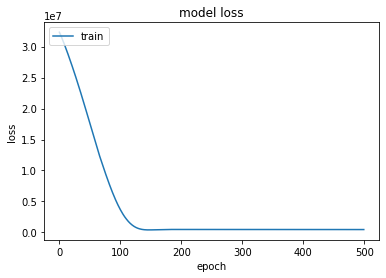

In [141]:
history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=500,  
          verbose=1,
          validation_data=(X_test, y_test))

print(history.history.keys())


# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


model.save('model.h5')

In [0]:
result=model.predict(X_test)

In [143]:
result

array([[ 1114.218   ],
       [11124.296   ],
       [ 1115.1089  ],
       [   11.627534],
       [11022.218   ],
       [ 1004.7365  ],
       [10032.3     ]], dtype=float32)

In [144]:
X_test

array([[   11,  1110],
       [   22, 11101],
       [   10,  1111],
       [    2,    11],
       [   16, 11000],
       [   14,  1001],
       [   28, 10010]])

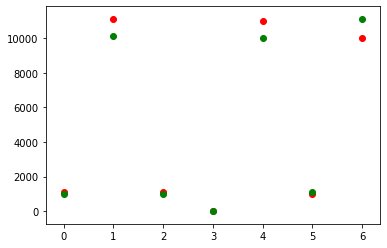

In [145]:
plt.scatter(range(7),result,c='r')
plt.scatter(range(7),y_test,c='g')
plt.show()